In [0]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas as pd
import numpy
import pickle

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
ииииииииии
Mounted at /content/gdrive


In [0]:
url = "/content/gdrive/My Drive/a/DataSet_v1.csv"
dataframe = read_csv(url)
dataframe.head()

,City,Road Surface,Lighting Conditions,Holiday,Weather Conditions,No Accidents
0,Akkaraipattu,Dry,Darkness: no street lighting,False,Fine without high winds,1
1,Akkaraipattu,Dry,Darkness: street lighting unknown,False,Fine without high winds,13
2,Akkaraipattu,Dry,Darkness: street lights present and lit,False,Fine without high winds,6
3,Akkaraipattu,Dry,Daylight: street lights present,False,Fine without high winds,34
4,Akkaraipattu,Wet / Damp,Darkness: street lighting unknown,False,Raining without high winds,1


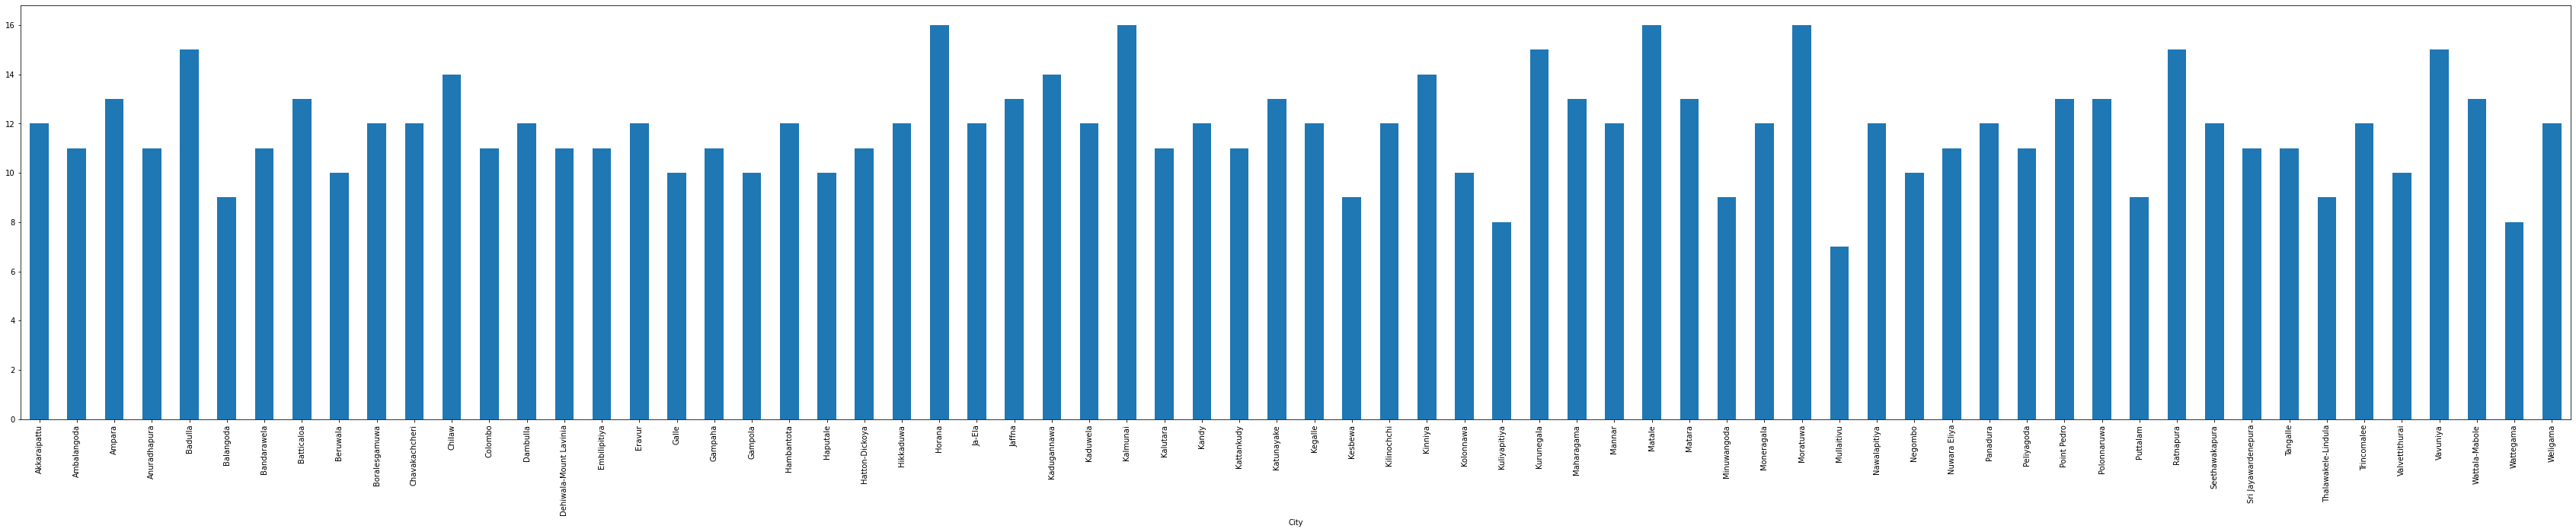

In [0]:
dataframe.groupby(by=['City']).size().plot(x='City', y='No Accidents', kind='bar', figsize=(60,10))

In [0]:
from sklearn import preprocessing
def convert_to_labels(data_col):
  le = preprocessing.LabelEncoder()
  le.fit(data_col)
  encoded_col = le.transform(data_col)
  return le, encoded_col

x_cols = ['City', 'Road Surface', 'Lighting Conditions', "Holiday", "Weather Conditions"]
x_encoders = {}
for col in x_cols:
  (encoder, result) = convert_to_labels(dataframe[col])
  x_encoders[col] = encoder
  dataframe[col] = result

In [0]:
def save_encoders():
  for col in x_cols:
    numpy.save('/content/gdrive/My Drive/a/{0}.npy'.format(col+"_encoder"), x_encoders[col].classes_)

save_encoders()

In [0]:
dataframe.head(4)

,City,Road Surface,Lighting Conditions,Holiday,Weather Conditions,No Accidents
0,0,0,0,0,1,1
1,0,0,1,0,1,13
2,0,0,2,0,1,6
3,0,0,4,0,1,34


In [0]:
X_dframe = dataframe.drop(columns=['No Accidents'])
Y_dframe = dataframe['No Accidents']
X = X_dframe.values
Y = Y_dframe.values

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler().fit(X)
#X = scaler.transform(X)

In [0]:
X_train, X_validation, Y_train, Y_validation  = train_test_split(X, Y, train_size=0.66, random_state=1)

In [0]:
model = LinearRegression(normalize=True)
kfold = KFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='r2')
print("LR : %f (%f)" % (cv_results.mean(), cv_results.std()))

LR : 0.436712 (0.105780)


In [0]:
model.fit(X,Y)
filename = '/content/gdrive/My Drive/a/finalized_model.sav'
pickle.dump(model, open(filename, 'wb'), protocol=2)

In [0]:
numpy.save('/content/gdrive/My Drive/a/classes.npy', x_encoders['Weather Conditions'].classes_)

In [0]:
encoder = preprocessing.LabelEncoder()
encoder.classes_ = numpy.load('/content/gdrive/My Drive/a/classes.npy', allow_pickle=True)

In [0]:
encoder.classes_

array(['Fine with high winds', 'Fine without high winds',
       'Fog or mist \x96 if hazard', 'Other', 'Raining with high winds',
       'Raining without high winds', 'Snowing with high winds',
       'Snowing without high winds', 'Unknown'], dtype=object)

In [0]:
model.predict([[0,	0,	4,	0,	1]])

array([18.12225712])

In [0]:
class InputEncoder:

  def __init__(self, columns):
    self.encoders = {}
    for col in columns:
      encoder = preprocessing.LabelEncoder()
      encoder.classes_ = numpy.load('/content/gdrive/My Drive/a/{0}_encoder.npy'.format(col), allow_pickle=True)
      self.encoders[col] = encoder

  def format_inputs(self, inp_obj):
    formatted_inp = []
    #print(self.encoders)
    for key in inp_obj:
      #print(key)
      column = self.encoders[key].transform([inp_obj[key]])
      formatted_inp.append(column[0])
    return formatted_inp
  


In [0]:
InputEncoder(['City']).format_inputs({"City":"Akkaraipattu"})

{'City': LabelEncoder()}
City


[0]

In [0]:
import requests
import shutil
response = requests.get('https://accidentbucket.s3.amazonaws.com/model/encoders/City_encoder.npy', stream=True)

with open('haha.npy', 'wb') as fin:
    shutil.copyfileobj(response.raw, fin)


encoder = preprocessing.LabelEncoder()
encoder.classes_ = numpy.load('haha.npy', allow_pickle=True)

ValueError: ignored

In [0]:
len(list(dataframe['City'].unique()))

68